# Explorando e comparando distribuições: KDE, ECDF e Boxplot

No capítulo 3, vimos um gráfico que nos ajudava a entender como os valores de uma variável numérica estavam distribuídos: o histograma. Neste capítulo, vamos voltar a explorar conceitos relacionados a distribuições de valores e, em seguida, vamos aprender a utilizar e interpretar 3 novos tipos de gráfico: o gráfico de estimativa do kernel de densidade (KDE), e o gráfco de distribuição acumulada empírica (ECDF) e o gráfico de caixa (Boxplot). 

## Alternativas ao histograma para verificar padrões de concentração dos dados: KDE e EDCF

Vamos começar com os gráficos KDE e EDCF. Ambos apresentam formas distintas de verificar padrões nas nossas distribuições de dados.

### KDE (Kernel Density Estimate Plot)

O KDE (Kernel Density Estimate Plot) é um gráfico que se baseia em uma estimativa de densidade de observações relacionadas a cada valor, mas por definição essa estimativa é produzida de forma a gerar uma curva "suave" (*smooth*), ou seja, uma linha contínua que não apresenta rupturas súbitas ou descontinuidades. Dessa forma, conseguimos visualizar bem o formato da distribuição, superando um dos principais problemas do histograma: o fato de que o seu formato depende do número de intervalos (bins) que estamos considerando.

Vamos colocar isso em prática, comparando o histograma com o gráfico KDE. Observe o código a seguir. Primeiro, precisamos carregar as bibliotecas necessárias e para carregar nossa base de dados (neste caso, estamos utilizando novamente a base do IDH em 2022).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

idh_2022 = pd.read_csv("https://bit.ly/idh_tidy_2022")

Agora vamos criar um histograma dos valores do IDH dos 194 países presentes em nossa base, em 2022, utilizando a função `histplot`, que já conhecemos.

<Axes: xlabel='idh', ylabel='Count'>

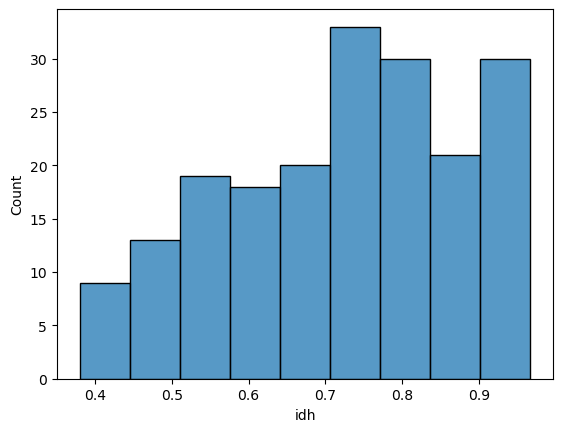

In [48]:
sns.histplot(x="idh", data=idh_2022)

Em seguida, vamos utilizar a mesma coluna `"idh"` da nossa base para produzir um resultado equivalente, mas ao invés da função `histplot`, vamos utilizar a função `kdeplot`, que cria o gráfico de estimativa de densidade que descrevemos anteriormente.

<Axes: xlabel='idh', ylabel='Density'>

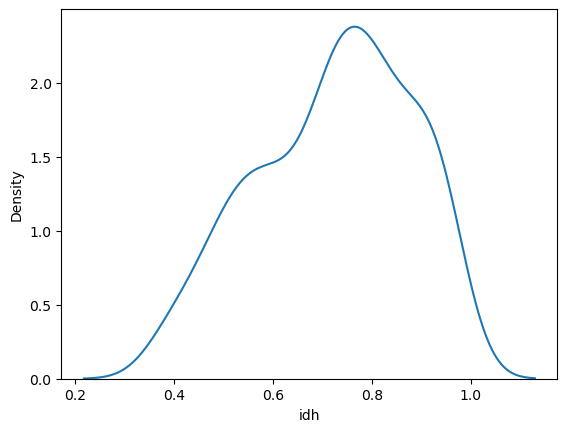

In [32]:
sns.kdeplot(x="idh", data=idh_2022)

Como podemos observar, o gráfico KDE enfatiza apenas o formato da distribuição, mostrando de forma ainda mais clara onde os valores das observações estão mais concentrados (valores entre 0.65 e 0.95). No entanto, esse gráfico tem suas próprias limitações. A principal delas é que, para manter a continuidade da curva, o KDE representa valores mínimos e máximos que não são de fato observados nos dados.

Note que no gráfico KDE parece existirem países com IDH próximo de 0.2, mas ao observarmos o nosso histograma verificamos que isso não é verdade. Isso ocorre porque há um corte súbito nos dados em determinada faixa de valor, mas o KDE busca sempre representar continuidade nos dados, mesmo quando ela não está presente. Outro problema, ainda mais grave para o IDH, é que o KDE nesse caso parece indicar a existência de valores acima de 1, o que não seria possível, pela própria definição da medida.

Esses fatores fazem que o KDE seja um gráfico que depende de uma interpretação bastante cuidadosa. É, portanto, um gráfico útil para visualizar rapidamente o formato da distribuição, mas que possui nem sempre é a melhor opção quando queremos nos comunicar com interlocutores que não conhecem as sutilezas de interpretação desse gráfico. Por essa razão ele tende a ser mais utilizado em trabalhos com leitores técnicos.

### ECDF (Empirical Cumulative Distribution Function)

A curva ECDF (Empirical Cumulative Distribution Function) é uma excelente alternativa quando queremos entender como os dados estão distribuídos. Como o histograma, ela nos oferece uma visão dos dados que é simples de interpretar. A EDCF nos diz com clareza, para cada valor da variável numérica que estamos estudando, qual é a proporção das observações que é menor ou igual àquele valor.

A forma mais simples de entendermos essa curva é por meio de um exemplo. Vamos representar a mesma variável `"idh"` que antes, mas agora vamos utilizar a função `ecdfplot`.

<Axes: xlabel='idh', ylabel='Proportion'>

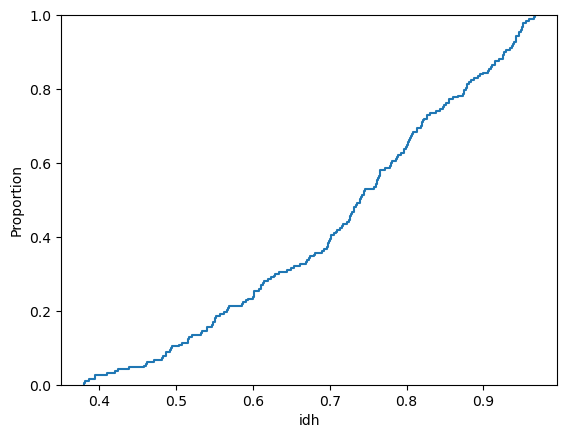

In [34]:
sns.ecdfplot(x="idh", data=idh_2022)

Vamos pegar, a título de exemplo, o valor de IDH de `0.6`. Podemos ver que a curva ECDF está associando a esse valor uma proporção, no eixo y, próxima a `0.25`. Isso significa que 25% dos países em nossa base possuem um IDH igual ou menor a `0.6`. Por outro lado, se tomamos o valor do IDH de `0.9`, vamos que a curva associa a esse valor uma proporção superior a `0.8`, ou seja, mais de 80% dos países possuem IDH igual ou inferior a `0.9` (ou, o que daria no mesmo, podemos pensar que menos de 20% dos países possuem valor do IDH superior a `0.9`).

Com efeito, a interpretação da curva ECDF é bastante intuitiva. Quando queremos entender a proporção de casos que se encontram concentradas até uma certa faixa de valor ele é nossa melhor alternativa. No entanto, para visualizar os pontos de concentração de dados, precisamos verificar em que regiões da curva ela está crescendo mais rápido (ou seja, verificar a inclinação da curva). É mais difícil visualizar essa inclinação do que seria visualizar a altura da barra de um histograma, ou a altura da curva de um KDE. Por isso, muito embora a curva ECDF nos ofereça uma informação rica e fácil de interpretar, ela não é a ferramenta mais apropriada quando tudo que queremos é saber em que intervalos de valor as observações estão mais concentradas.



## Boxplot: um poderoso resumo estatístico

A última ferramenta gráfica que veremos neste capítulo é o boxplot, uma poderosa alternativa que nos fornece muita informação condensada a respeito da distribuição quando sabemos ler a visualização corretamente. Essa é também sua grande limitação, para leitores não familiarizados, sua interpretação fica bem complicada.

Mas, antes de apresentar essa ferramenta gráfica, precisamos entender alguns conceitos relevantes acerca da divisão das distribuições numéricas.

### A divisão de uma distribuição em quartis

Quando estamos lidando com conjuntos de dados, é comum querermos entender como esses valores estão distribuídos, ou seja, como eles se espalham e onde estão concentrados. Para isso, dividimos o conjunto em partes chamadas **quartis**. A divisão dos dados em quartis nos fornece uma visão clara tanto do centro quanto da dispersão dos dados em uma análise estatística.

Vamos imaginar que temos um conjunto de dados com as idades de um grupo de 12 pessoas: 22, 24, 25, 28, 30, 35, 40, 42, 45, 50, 54, 60. Esses números representam as idades das pessoas em um grupo e estão ordenados do menor para o maior. Queremos dividir os dados em quatro partes com o mesmo número de observações em cada uma. Neste caso, como temos 12 idades, cada parte deve ficar com 3 observações. Podemos pensar que cada quartil é um desses "pedaços" ou "partes" da nossa distribuição ordenada. Nesse caso, teremos a seguinte divisão das nossas idades:

- **1º Quartil**: 13, 24, 25
- **2º Quartil**: 28, 30, 35
- **3º Quartil**: 40, 42, 45
- **4º Quartil**: 50, 54, 75

Utilizamos também o termo "quartil", comumente, com um sentido um pouco distinto. Esse termo é frequentemente usado para se referir aos valores das fronteiras que utilizamos para separar os dados em quatro partes. Por essa definição, temos o seguinte:

- **Q1**: o primeiro quartil (Q1) é o valor que separa os 25% menores dos dados do restante (em nosso exemplo, esse valor seria `27.25`, que é 3/4 da distância entre 25 e 28). 
- **Q2**: o segundo quartil (Q2) é a mediana (o valor central), que divide as observações ao meio (em nosso exemplo, esse valor é `37.5`, a metade da distância entre 35 e 40).
- **Q3**: por fim, o terceiro quartil (Q3) separa os 75% menores valores observados nos dados dos 25% maiores (em nosso exemplo, seria o valor de `46.25`, ou seja, 1/4 da distância entre 45 e 50).

### Intervalo interquartil (IQR)

Uma medida muito interessante utilizada para entender a dispersão dos dados, ou seja, o quão espalhados eles estão, é o chamado Intervalo Interquartil (IQR). O IQR nada mais é do que a diferença entre o valor de fronteira do terceiro quartil (Q3) e o valor de fronteira do primeiro quartil (Q1). No nosso exemplo:

    IQR = Q3 - Q1 = 46.25 - 27.25 = 19

Isso significa que uma parcela muito significativa e representativa das idades no grupo (os 50% centrais) está concentrada em uma faixa de 19 anos, que varia entre aproximadamente 27 anos e 46 anos. O IQR nos dá, portanto, uma ideia de como os dados estão distribuídos ao redor da mediana e exclui a influência de valores extremos, focando na dispersão dos dados que estão no meio do conjunto.

### Boxplot

O Boxplot é um gráfico que representa justamente essas medidas de divisão da distribuição. Ele consiste em uma caixa, cujos limites externos são Q1 e Q3, ou seja, é uma caixa cuja extensão representa o IQR. No interior dessa caixa, desenhamos uma linha que representa a mediana. O restante dos dados é representado por linhas (que chamamos de bigodes, ou "whiskers") e pontos (casos mais extremos, uma tentativa de mostrar os *outliers* <a id="footnote-1-ref" href="#footnote-1">[1]</a> do conjunto de dados).

A figura abaixo mostra o desenho de um boxplot, com a indicação do significado de cada um de seus elementos.

<center><img src="https://lthevenard.github.io/curso_prog/assets/imagens/boxplot.001.png" alt="Boxplot" style="width: 400px;"/></center>

Vamos agora criar um boxplot, de modo semelhante ao que fizemos antes com o KDE e o ECDF, mas agora utilizando a função `boxplot` para vizualizar a distribuição dos valores da coluna `"idh"`.

Notas:

<p id="footnote-1">[1] Nesse caso, estamos usando uma definição específica de <i>outlier</i>. Contudo, esse termo é usado de forma muito comum e com definições diferentes. O que há em comum é que são formas diferentes de identificar valores considerados atípicos de um conjunto de dados. Pense, por exemplo, o quão bem a Ação Penal 470 (Caso do Mensalão) representa o tamanho típico de decisões tomadas pelo Supremo Tribunal Federal.<a href="#footnote-1-ref">&#8617;</a> </p> 

<Axes: xlabel='idh'>

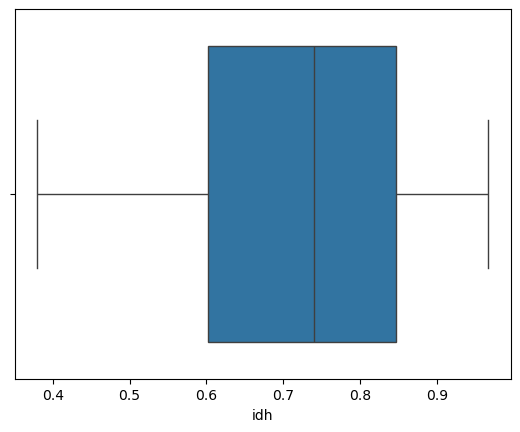

In [58]:
sns.boxplot(x="idh", data=idh_2022)

O Boxplot nos mostra claramente onde está a principal concentração dos dados: vemos que o intervalo interquartil, representado pela caixa do Boxplot e contendo as 50% observações centrais, está situado entre o IDH de `0.6` e cerca de `0.87`. Isso significa que 50% dos países possuiam IDH nessa faixa de valores em 2022. Além disso, o Boxplot nos mostra onde está a mediana da nossa distribuição: ela se situa próxima ao valor de `0.75`. Isso significa que metade dos países possuíam IDH abaixo de 0.75 e metade acima desse valor. Por fim, os whiskers do Boxplot nos mostram onde estão o menor e o maior valor da ditribuição excluindo os *outliers*. Nesse exemplo, não temos pontos porque não há nenhum valor discrepante, muito distante da tendência central dos dados.

Para reforçar a interpretação do Boxplot, vamos agora criar um gráfico com a distribuição da variável de renda per capita dos países, que está na coluna `"idh_rpc"` da nossa base. Vamos aproveitar para mexer em alguns argumentos da função também. Vamos mudar a cor da linha do Boxplot utilizando o argumento `linecolor` e vamos retirar o preenchimento de cor, com a opção `fill=False`.

<Axes: xlabel='idh_rpc'>

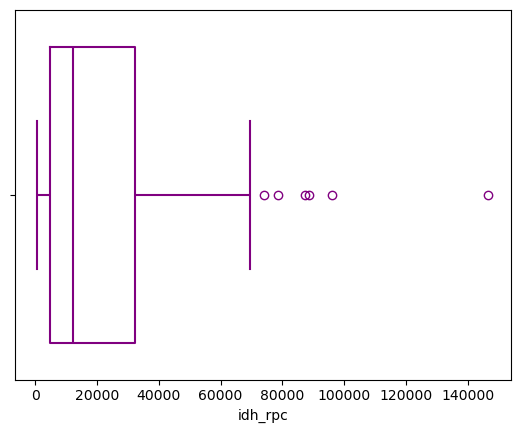

In [59]:
sns.boxplot(x="idh_rpc", fill=False, color="purple", data=idh_2022)

Nesse gráfico podemos ver a presença de valores discrepantes, que podem ser outliers de nossa distribuição, representados como pontos além da linha dos bigodes (*whiskers*) do Boxplot.

## Filtrando dados e comparando distribuições

O Boxplot, como veremos a seguir, é um gráfico muito útil para fazer comparações entre distribuições da mesma variável numérica. Mas, para fazermos isso, vamos primeiro aprender a filtrar nossa base de dados, de forma a escolher algumas categorias que temos mais interesse em comparar.

### Filtrando dados com o método `.query()`

O que queremos fazer agora é manter apenas um conjunto de linhas de nossos dados. Por exemplo, poderíamos selecionar apenas as linhas referentes ao Brasil (usando a variável `"pais"`), ou apenas as linhas referentes aos países da América Latina e do Caribe (usando a variável `"regiao"`). Na prática, o que queremos é selecionar apenas as linhas que satisfaçam uma condição lógica. Para fazer isso, precisamos usar uma variável (coluna), e criar uma condição que define quais linhas queremos manter.

Vamos usar o método `.query()` em nossa base de dados, e vamos passar uma string (texto entre aspas) com a condição com a qual queremos filtrar nossos dados. A formulação dessa condição obdece a uma sintaxe específica, de comparações lógicas. Não vamos tratar de todas as possibilidades nesta aula, vamos ver inicialmente alguns recursos e nas próximas aulas vamos ver outras possibilidades.

Para começar, apenas a título de exemplo, vamos filtrar a nossa base de dados para selecionar apenas a linha referente ao Brasil (lembrando que, na base de dados de 2022, só temos uma linha para cada país). Para isso, vamos usar a expressão `"pais == 'Brasil'"`, que filtra a base estabelecendo que a coluna `"pais"` deve ser igual ao valor `'Brasil'` (usamos aspas simples apenas porque já estamos usando aspas duplas para definir a expressão como um todo). Veja a seguir o resultado.

In [61]:
idh_2022.query("pais == 'Brasil'")

,sigla,pais,grupo_idh,regiao,ranking_idh,idh,idh_ev,idh_ee,idh_me,idh_rpc,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
23,BRA,Brasil,Alto,América Latina e Caribe,89.0,0.76,73.425,15.5788,8.278308,14615.89235,...,70.296,14.95002,8.039534,18061.22633,17.508418,82.491582,53.75,73.64,2.319858,215.313498


Assim filtramos apenas a linha com o valor `"Brasil"` na coluna `"pais"`. Uma outra forma de fazer isso seria criar uma variável com o valor `"Brasil"` para, em seguida, utilizá-la na condição. Toda vez que quisermos usar uma variável no texto da condição, devemos referenciá-la antecedida pelo símbolo `"@"`, assim a função `.query()` sabe que se trata de uma variável que criamos em nosso código. Observe o código a seguir.

In [63]:
pais_selecionado = "Brasil"

idh_2022.query("pais == @pais_selecionado")

,sigla,pais,grupo_idh,regiao,ranking_idh,idh,idh_ev,idh_ee,idh_me,idh_rpc,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
23,BRA,Brasil,Alto,América Latina e Caribe,89.0,0.76,73.425,15.5788,8.278308,14615.89235,...,70.296,14.95002,8.039534,18061.22633,17.508418,82.491582,53.75,73.64,2.319858,215.313498


Agora vamos igualar uma coluna a mais de um valor. Vamos criar uma variável que será uma lista dos países que queremos manter, em seguida vamos fazer utilizar em uma condição. A condição nesse caso não pode mais se basear em uma comparação de igualdade (operador `"=="`), mas sim em uma comparação de pertencimento à lista (operador `"in"`). Veja o exemplo do código a seguir, que filtra apenas as linhas referentes ao Brasil e à Argentina.

In [64]:
paises_selecionados = ["Brasil", "Argentina"]

idh_2022.query("pais in @paises_selecionados")

,sigla,pais,grupo_idh,regiao,ranking_idh,idh,idh_ev,idh_ee,idh_me,idh_rpc,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
6,ARG,Argentina,Muito Alto,América Latina e Caribe,48.0,0.849,76.064,18.979509,11.144080,22047.97131,...,72.851,17.130329,10.857980,27264.83091,44.376900,55.623100,52.08,71.74,4.190779,45.510318
23,BRA,Brasil,Alto,América Latina e Caribe,89.0,0.760,73.425,15.578800,8.278308,14615.89235,...,70.296,14.950020,8.039534,18061.22633,17.508418,82.491582,53.75,73.64,2.319858,215.313498


### Usando o Boxplot para comparar distribuições

Vamos agora filtrar nossa base para comparar grupos de países. Para isso, vamos filtrar os dados por região. Queremos comparar apenas os valores do IDH dos países da `"América Latina e Caribe"` e da `"Europa e Ásia Central"`. Para isso vamos criar a lista `"regioes_selecionadas"`, com os nomes das regiões, e usar o operador `"in"` para filtrar a coluna `"regiao"`. Dessa vez, vamos salvar nossa base de dados filtrada em uma nova variável, que chamaremos de `idh_regioes_selecionadas`.

In [66]:
regioes_selecionadas = ["América Latina e Caribe", "Europa e Ásia Central"]

idh_regioes_selecionadas = idh_2022.query("regiao in @regioes_selecionadas")

idh_regioes_selecionadas.head()

,sigla,pais,grupo_idh,regiao,ranking_idh,idh,idh_ev,idh_ee,idh_me,idh_rpc,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
1,ALB,Albânia,Alto,Europa e Ásia Central,74.0,0.789,76.833,14.487470,10.121144,15293.32651,...,74.502,14.292200,10.433855,17398.00369,35.714286,64.285714,56.08,69.91,1.717758,2.842321
5,ATG,Antígua e Barbuda,Muito Alto,América Latina e Caribe,54.0,0.826,79.236,15.512328,10.546230,18783.96536,...,76.507,14.350537,10.595975,NaN,31.428571,68.571429,NaN,NaN,6.401056,0.093763
6,ARG,Argentina,Muito Alto,América Latina e Caribe,48.0,0.849,76.064,18.979509,11.144080,22047.97131,...,72.851,17.130329,10.857980,27264.83091,44.376900,55.623100,52.08,71.74,4.190779,45.510318
7,ARM,Armênia,Alto,Europa e Ásia Central,76.0,0.786,73.372,14.405610,11.330300,15388.29976,...,67.866,14.022340,11.341190,17770.41530,35.514019,64.485981,62.80,71.84,2.531088,2.780469
10,AZE,Azerbaijão,Alto,Europa e Ásia Central,89.0,0.760,73.488,12.710630,10.556130,15018.05443,...,70.550,12.743980,10.918435,18603.12947,18.333333,81.666667,61.90,69.60,3.717030,10.358074


Agora vamos usar o Boxplot para comparar as distribuições da variável `"idh"` de cada `"regiao`. Para isso, especificamos os dois eixos na função `boxplot`, utilizando a base de dados que filtramos (`idh_regioes_selecionadas`).

<Axes: xlabel='idh', ylabel='regiao'>

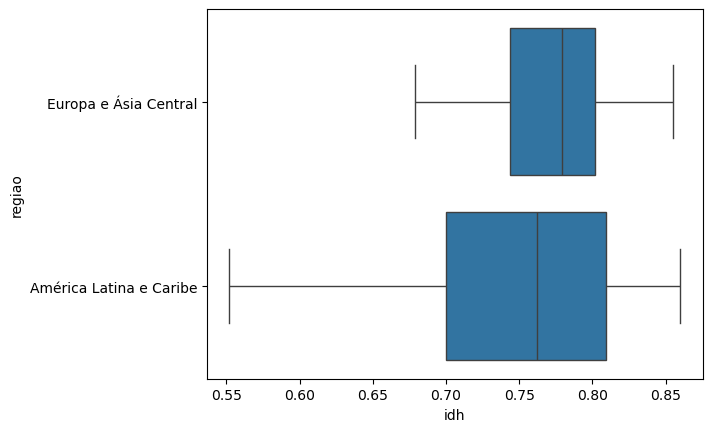

In [67]:
sns.boxplot(x="idh", y="regiao", data=idh_regioes_selecionadas)

O gráfico nos permite comparar as distribuições das duas regiões e tirar conclusões interessantes. Por exemplo, observamos que a mediana do IDH da América Latina e Caribe é mais baixa do que a da Europa e Ásia Central. Além disso, a distribuição dos países da América Latina e Caribe é substancialmente mais dispersa do que a dos países da Europa e Ásia Central, o que se nota tanto em razão da diferença de tamanho da caixa do Boxplot, o que denota valores diferentes do IQR, como também em razão da diferença na amplitude total da distribuição (incluindo os *whiskers*).